In [2]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

%matplotlib inline

# 1. Read Data

In [3]:
path = "~/Desktop/kaggle/Porto/"
df = pd.read_csv(path+'train.csv',index_col='id',nrows=50000)
df = df.reset_index(drop=True)

# 2. Get Features and Target

## 2.1 Categorical

In [4]:
cats = pd.DataFrame()
for col in df.columns:
    if 'cat' in col:
        cats = pd.concat([cats,pd.get_dummies(df[col],prefix=col)],axis=1)

## 2.2 Binary

In [5]:
cols = []
for col in df.columns:
    if 'bin' in col:
        cols.append(col)
        
bins = df[cols]

## 2.3 Features

In [6]:
df = df[['target']]
df = pd.concat([bins,cats,df],axis=1)

In [7]:
features = list(df.columns)
target = 'target'
features.remove(target)

In [9]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.33, random_state=42)

In [10]:
train.head()

,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,...,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104,target
23990,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
8729,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3451,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2628,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38352,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# 4. Build Model

## 4.1 Training

In [11]:
from keras import regularizers
model = Sequential()
model.add(Dense(50, input_dim=200, activation='relu',
                #activity_regularizer=regularizers.l1(10e-5)))
                activity_regularizer=regularizers.l1(10e-3)))
model.add(Dense(200, activation='sigmoid'))

In [51]:
from keras import optimizers
from keras.callbacks import EarlyStopping

optimizers.Adam(lr=0.5, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(loss='binary_crossentropy', optimizer='adadelta')

X_train = np.array(train[train.target==0][features])

callbacks = [
    EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=2, verbose=0)
    #ModelCheckpoint(kfold_weights_path, monitor='val_loss', save_best_only=True, verbose=0),
]

model.fit(X_train, 
          X_train, 
          epochs=200, 
          batch_size=1000, 
          validation_data=(X_test,X_test),
          #validation_split=0.2,
          callbacks=callbacks,
          verbose=1)

Train on 32274 samples, validate on 15893 samples
Epoch 1/200
32274/32274 [==============================] - 1s - loss: 0.1558 - val_loss: 0.1574

In [52]:
model.evaluate(X_train,X_train)

31072/32274 [===========================>..] - ETA: 0s

0.15568323304028645

## 4.2 Test

In [53]:
X_test = np.array(test[test.target==0][features])
X_test1 = np.array(test[test.target==1][features])

In [54]:
model.evaluate(X_test,X_test)

15296/15893 [===========================>..] - ETA: 0s

0.15552792221519651

### Residual for class 0

In [55]:
X_test_pred = model.predict(X_test)

In [56]:
Red = pd.DataFrame(X_test_pred-X_test)

In [57]:
Red.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.39768,-0.747929,0.163661,0.186573,0.016418,0.017176,0.021345,0.016576,-0.337861,0.119306,...,0.019421,0.017809,0.01778,0.018816,0.028365,0.020396,0.02343,0.018132,0.045088,0.140166
1,-0.60232,0.252071,0.163661,0.186573,0.016418,0.017176,0.021345,0.016576,-0.337861,0.119306,...,0.019421,0.017809,0.01778,0.018816,0.028365,0.020396,0.02343,0.018132,0.045088,0.140166
2,-0.60232,0.252071,0.163661,0.186573,0.016418,0.017176,0.021345,0.016576,0.662139,0.119306,...,0.019421,0.017809,0.01778,0.018816,0.028365,0.020396,0.02343,0.018132,0.045088,0.140166
3,0.39768,0.252071,0.163661,-0.813427,0.016418,0.017176,0.021345,0.016576,-0.337861,0.119306,...,0.019421,0.017809,0.01778,0.018816,0.028365,0.020396,0.02343,0.018132,0.045088,0.140166
4,0.39768,-0.747929,0.163661,0.186573,0.016418,0.017176,0.021345,0.016576,-0.337861,0.119306,...,0.019421,0.017809,0.01778,0.018816,0.028365,0.020396,0.02343,0.018132,0.045088,0.140166


In [58]:
Red = Red.applymap(abs).apply(sum,axis=1)

### Residual for class 1

In [59]:
X_test1_pred = model.predict(X_test1)

In [47]:
Red1 = pd.DataFrame(X_test1_pred-X_test1)

In [48]:
Red1 = Red1.applymap(abs).apply(sum,axis=1)

### Distribution of residuals

(array([ 0.17739887,  0.44349717,  0.70959547,  0.44349717,  1.06439321,
         1.59658982,  2.30618529,  2.5722836 ,  2.92708133,  3.19317964,
         3.99147454,  3.81407568,  4.52367115,  3.19317964,  4.78976945,
         3.45927794,  2.66098303,  2.5722836 ,  2.04008699,  1.86268812,
         1.68528925,  0.88699434,  1.06439321,  0.2660983 ,  0.44349717,
         0.2660983 ,  0.17739887,  0.08869943,  0.35479774,  0.2660983 ]),
 array([ 2.79948398,  2.81805734,  2.8366307 ,  2.85520406,  2.87377742,
         2.89235078,  2.91092414,  2.9294975 ,  2.94807086,  2.96664422,
         2.98521758,  3.00379094,  3.0223643 ,  3.04093765,  3.05951101,
         3.07808437,  3.09665773,  3.11523109,  3.13380445,  3.15237781,
         3.17095117,  3.18952453,  3.20809789,  3.22667125,  3.24524461,
         3.26381797,  3.28239133,  3.30096468,  3.31953804,  3.3381114 ,
         3.35668476]),
 <a list of 30 Patch objects>)

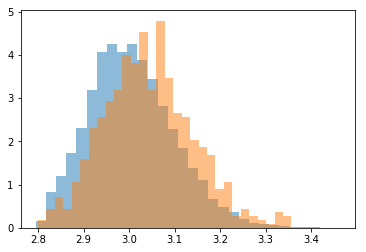

In [49]:
plt.hist(np.log1p(Red),bins=30,normed=True,alpha=0.5)
plt.hist(np.log1p(Red1),bins=30,normed=True,alpha=0.5)